In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [56]:
df = pd.read_csv('../sem/Dataset.csv')
df

,address,bank,atm_id,coord_x,coord_y,freguesia,parish,mway_dist,police_dis,income,...,unp_rate,com_dens,freq_attack,success_attack,n_income,n_density,n_age,n_unp_rate,n_com_dens,n_freq_attack
0,Rua Tomas Da Fonseca TR a Lisbon,BANCO BPI S.A.,BPI17,-9.17093,38.75610,Lumiar,12,195.353440,898.569719,52,...,4,9,4,1,5,2,2,1,2,1
1,Estrada De Telheiras Lisbon,BANCO COMERCIAL PORTUGUES,CP01,-9.15911,38.76020,Lumiar,12,190.831787,568.679321,56,...,2,9,3,1,5,1,2,1,2,1
2,Rua Abranches Ferrao 8C Lisbon,BANCO COMERCIAL PORTUGUES,CP52,-9.17203,38.75064,Carnide,10,766.671635,1432.302696,52,...,9,18,3,1,5,1,2,2,2,1
3,Avenida Dom Vasco Da Gama 50 a Lisbon,BANCO SANTANDER TOTTA,ST98,-9.22544,38.69942,Belém,6,192.282794,1143.736479,36,...,15,9,3,0,3,2,4,4,2,1
4,Rua Abranches Ferrao 17-B Lisbon,BARCLAYS BANK,BB07,-9.17070,38.75117,Lumiar,12,719.798770,1371.942724,58,...,8,18,2,1,6,3,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,Travessa Do Castro 1 Lisbon,BANCO SANTANDER TOTTA,ST94,-9.19092,38.70430,Alcântara,1,1254.899666,1155.337295,26,...,17,9,0,0,2,4,1,4,2,0
719,Aeroporto Da Portela Lisbon,BANCO SANTANDER TOTTA,ST95,-9.13537,38.77559,Olivais,15,1173.742253,710.121989,50,...,5,9,0,0,5,1,2,2,2,0
720,Rua Rodrigo Da Fonseca 143 a Lisbon,BANCO SANTANDER TOTTA,ST96,-9.15813,38.72826,Campolide,9,1451.298659,471.645154,40,...,16,18,0,0,4,2,3,4,2,0
721,Condominio Villa Restelo - R. San Levy Lisbon,BANCO SANTANDER TOTTA,ST97,-9.13934,38.72225,Arroios,4,2939.661625,365.224278,56,...,9,9,0,0,5,1,3,2,2,0


In [75]:
df.values

array([['Rua Tomas Da Fonseca TR a Lisbon', 'BANCO BPI S.A.', 'BPI17',
        ..., 1, 2, 1],
       ['Estrada De Telheiras Lisbon', 'BANCO COMERCIAL PORTUGUES',
        'CP01', ..., 1, 2, 1],
       ['Rua Abranches Ferrao 8C Lisbon', 'BANCO COMERCIAL PORTUGUES',
        'CP52', ..., 2, 2, 1],
       ...,
       ['Rua Rodrigo Da Fonseca 143 a Lisbon', 'BANCO SANTANDER TOTTA',
        'ST96', ..., 4, 2, 0],
       ['Condominio Villa Restelo - R. San Levy Lisbon',
        'BANCO SANTANDER TOTTA', 'ST97', ..., 2, 2, 0],
       ['Rua Mario Botas Lisbon', 'BANCO SANTANDER TOTTA', 'ST99', ...,
        2, 2, 0]], dtype=object)

In [89]:
z=df[['mway_dist','police_dis','success_attack']].values
sh_1,sh_2=z.shape
x,y=np.linspace(0,1,sh_1),np.linspace(0,1,sh_2)
fig=go.Figure(data=[go.Surface(x=x,y=y,z=z)])
fig.update_layout(title='3d plot for attack success rate',autosize=False)
fig.show()

3

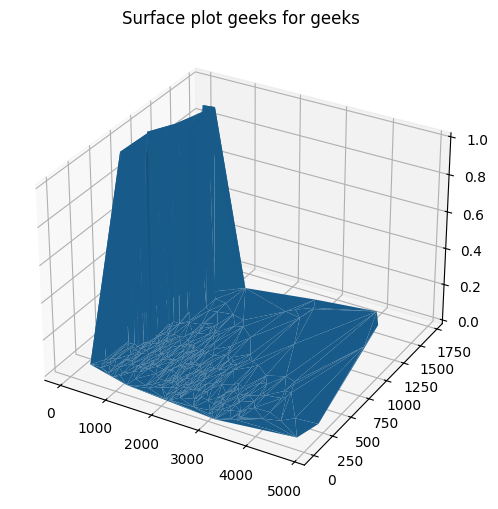

In [73]:
# defining surface and axes
x = df['mway_dist']
y = df['police_dis']
z = df['success_attack']
 
fig = plt.figure(figsize=(10,6))
 
# syntax for 3-D plotting
ax = fig.add_subplot(111,projection='3d')
 
# syntax for plotting
ax.plot_trisurf(x, y, z)
ax.set_title('Surface plot geeks for geeks')
3
#plt.show()

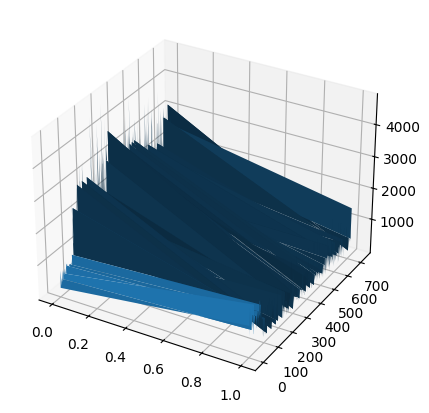

In [74]:
def plottable_3d_info(df: pd.DataFrame):
    """
    Transform Pandas data into a format that's compatible with
    Matplotlib's surface and wireframe plotting.
    """
    index = df.index
    columns = ['mway_dist','police_dis']#,'success_attack']

    x, y = np.meshgrid(np.arange(len(columns)), np.arange(len(index)))
    z = np.array([[df[c][i] for c in columns] for i in index])
    
    xticks = dict(ticks=np.arange(len(columns)), labels=columns)
    yticks = dict(ticks=np.arange(len(index)), labels=index)
    
    return x, y, z, xticks, yticks
x,y,z,xticks,yticks=plottable_3d_info(df)

fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,z)

In [ ]:
df['marker_type'] = 'circle'  # Default marker type for all points
# Example: Change the marker type for specific points based on their coordinates
df.loc[(df['mway_dist'] == 3000) & (df['police_dis'] == 1500), 'marker_type'] = 'star'
# Add more conditions as needed to change marker types for other points

# Create the interactive scatter plot
fig = px.scatter(df, x='mway_dist', y='police_dis', color='success_attack',
                 color_continuous_scale='viridis', size_max=30, symbol='marker_type',
                 range_x=[0, 4800], range_y=[0, 1700],
                 labels={'mway_dist': 'Motorway Distance', 'police_dis': 'Police Distance',
                         'success_attack': 'Success of Attack', 'marker_type': 'Marker Type'})

# Update layout
fig.update_layout(title='Interactive Scatter Plot of Motorway Distance vs Police Distance',
                  xaxis_title='Motorway Distance', yaxis_title='Police Distance',
                  coloraxis_colorbar_title='Success of Attack')

# Show the plot
fig.show()